# Introduction to Machine Learning and Deep Learning

### Acknowledgements

The content of this notebook was originally created by Nils Eckstein, Julia Buhmann, and Jan Funke for the 2021 DL@MBL course in Woods Hole, and later chopped up and modified by Florian Jug and Igor Zubarev for the 2022 course DL4MIA.

Some code cells will be marked with

########################################################################### <br>
#######                     FIND WAYS TO IMPROVE                    ####### <br>
########################################################################### <br>

or 

########################################################################### <br>
#######                      START OF YOUR CODE                     ####### <br>
########################################################################### <br>

... <br>

########################################################################### <br>
#######                       END OF YOUR CODE                      ####### <br>
########################################################################### <br>

This indicates that you need to find a possible errors in the code or in the function parameters. Or add some code...

In [1]:
# This cell should also be run for the super bonus exercise

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dense

### Let's get the MNIST data...

This is one of the most famous and most frequently used datasets of small images of hand-written digits and their corresponding ground-truth classes.

In this exercise we will learn to predict the correct class given an image of a hand-written digit.

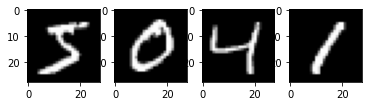

In [2]:
# This cell should also be run for the super bonus exercise 

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

"""
Returns:
2 tuples:

x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).
"""

# Show example data
plt.subplot(1,4,1)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,2)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,3)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,4)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

### Bring data in the shape we need during training...

In particular, this cell performs the following:
 * add a channel dimension to train and test data
 * normalize the pixel intensities to [0,1]
 * transform the ground-truth label from a digit (0, ..., 9) to one-hot encoded vectors. (Example: the one-hot encoded vector for digit `3` will become `0001000000`, etc.)

In [3]:
# This cell should also be run for the super bonus exercise 

from tensorflow.keras.utils import to_categorical

# add a channel dimension to the images
x_train = x_train.reshape(x_train.shape[0],
                          x_train.shape[1],
                          x_train.shape[2],
                          1)
x_test = x_test.reshape(x_test.shape[0],
                        x_test.shape[1],
                        x_test.shape[2],
                        1)

# rescale intensities to be between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 
x_test /= 255

# convert the labels into one-hot encodings
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

print('Train data shape', x_train.shape)
print('Test data shape', x_test.shape)

Train data shape (60000, 28, 28, 1)
Test data shape (10000, 28, 28, 1)


### Let's create a network we'd like to train...

The one currently implemented in the cell below will turn out to not work so well. Run it anyways, but then come back here and start playing with changing the network architecture and hopefully find a better working model for the task at hand!

In [4]:
input_shape = (x_train.shape[1], x_train.shape[2], 1)

###########################################################################
#######                    FIND WAYS TO IMPROVE                     #######
###########################################################################

# Structure
# Convolution-MaxPooling-Convolution-MaxPooling-Flatten-Dense(x2)

cnn_model = Sequential()
cnn_model.add(Conv2D(filters=1,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(filters=5, # only one filter? (answers to question of whether filters are arbitrarily chosen)
                     kernel_size=(3, 3),
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax')) # softmax for classification ?

cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam', # adaptive optimizer (still similar to SGD)
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 1)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 5)         50        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 5)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 125)               0         
                                                                 
 dense (Dense)               (None, 64)                8

2022-07-18 20:37:59.821997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 20:37:59.826365: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-07-18 20:37:59.826377: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-07-18 20:37:59.826766: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

### Train the network...

Note that we decided on some things like the number of epochs, or a batch_size... what is all this? Could we have chosen other values? What would change?

In [5]:
cnn_model.fit(x_train,
             y_train_onehot,
             batch_size=64,
             epochs=3,
             verbose=1,
             validation_data=(x_test, y_test_onehot)) # never actually validate using test data!

Epoch 1/3
938/938 [==============================] - 5s 5ms/step - loss: 0.3844 - accuracy: 0.8895 - val_loss: 0.1610 - val_accuracy: 0.9511
Epoch 2/3
938/938 [==============================] - 4s 5ms/step - loss: 0.1448 - accuracy: 0.9558 - val_loss: 0.1145 - val_accuracy: 0.9632
Epoch 3/3
938/938 [==============================] - 4s 5ms/step - loss: 0.1161 - accuracy: 0.9639 - val_loss: 0.0948 - val_accuracy: 0.9719


MNIST test set accuracy: 0.9718999862670898
CNN predictions: 7, 2, 1, 0


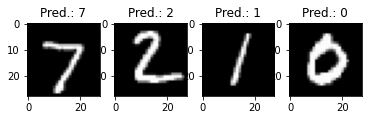

In [6]:
score = cnn_model.evaluate(x_test, y_test_onehot, verbose=0)
print('MNIST test set accuracy:', score[1])

# visualize some test data and network output
y_predict = cnn_model.predict(x_test, verbose=0)
y_predict_digits = [np.argmax(y_predict[i]) for i in range(y_predict.shape[0])]


plt.subplot(1,4,1)
plt.imshow(x_test[0,:,:,0], cmap=plt.get_cmap('gray'))
plt.title("Pred.: %d"%y_predict_digits[0])
plt.subplot(1,4,2)
plt.imshow(x_test[1,:,:,0], cmap=plt.get_cmap('gray'))
plt.title("Pred.: %d"%y_predict_digits[1])
plt.subplot(1,4,3)
plt.imshow(x_test[2,:,:,0], cmap=plt.get_cmap('gray'))
plt.title("Pred.: %d"%y_predict_digits[2])
plt.subplot(1,4,4)
plt.imshow(x_test[3,:,:,0], cmap=plt.get_cmap('gray'))
plt.title("Pred.: %d"%y_predict_digits[3])

print("CNN predictions: {0}, {1}, {2}, {3}".format(y_predict_digits[0],
                                                   y_predict_digits[1],
                                                   y_predict_digits[2],
                                                   y_predict_digits[3]))

### Show a few more examples, so we also see some of the errors...

Errors: 2


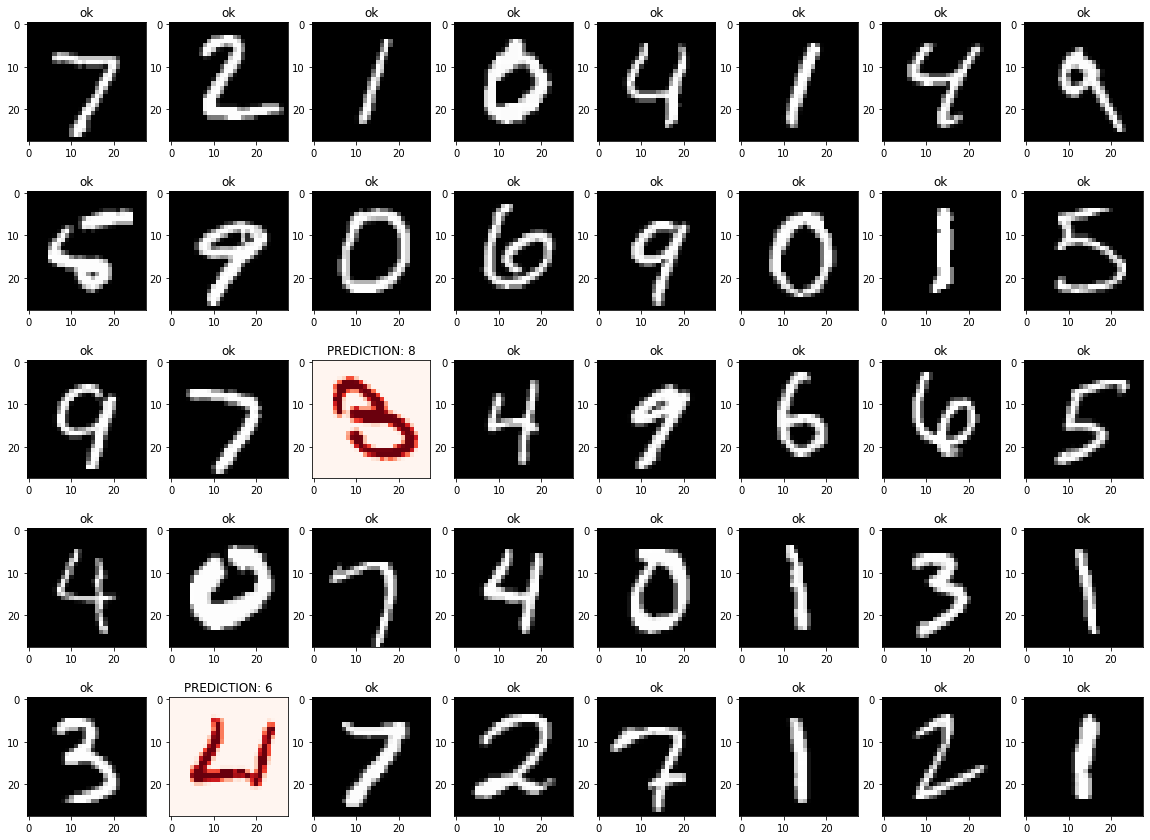

In [7]:
fig, axes = plt.subplots(5, 8, figsize=(20,15))
errors=0
for i in range(40):
    if y_predict_digits[i]==y_test[i]:
        axes.flatten()[i].imshow(x_test[i,:,:,0], cmap=plt.get_cmap('gray'))
        axes.flatten()[i].set_title('ok')
    else:
        axes.flatten()[i].imshow(x_test[i,:,:,0], cmap=plt.get_cmap('Reds'))
        axes.flatten()[i].set_title('PREDICTION: %s'%(y_predict_digits[i]))
        errors+=1
        
print("Errors: %d"%errors)

### NEXT: improve the network, maybe also the network training, and reduce the test errors...

Another fun exercise might be to try to find the smallest network (fewest trainable parameters) that still leads to an test error smaller 15%...

**Note:** You will find out that if you modify the network, TensorFlow might hick up... likely you want to restart the kernel every time you make changes to the network...

# Super bonus: A sneak peek into a different world

Let's try to replicate the same model in PyTorch! We'll use the same MNIST dataset. But first we need to install torch...

***IMPORTANT*** We might be out of memory because TensorFlow reserves all available memory. So we need to restart the kernel and run only cells 2 and 3, where we download the MNIST data and reshape it:

1 - Click on kernel > Restart

2 - Run the cells that start with the comment `# This cell should also be run for the super bonus exercise` (these are cells 1, 2 and 3 from this notebook)

3 - Continue the exercises from here

In [4]:
!conda install -y pytorch torchvision cudatoolkit=11.3 -c pytorch
!pip install torchsummary

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/mattia.toninelli/miniconda3/envs/intro_mldl

  added / updated specs:
    - cudatoolkit=11.3
    - pytorch
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py37h27cfd23_1003         320 KB
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    cryptography-37.0.1        |   py37h9ce1e76_0         1.3 MB
    ffmpeg-4.3                 |       hf484d3e_0         9.9 MB  pytorch
    freetype-2.11.0            |       h70c0345_0         618 KB
    giflib-5.2.1               |       h7b6447c_0          78 KB
    gmp-6.2.1                  |       h295c915_3         544 KB
    g

In [4]:
# Test if GPU is available in torch. We may need to run this part on CPU because of hardware incompability
import torch 
print('CUDA available: ', torch.cuda.is_available())
print('PyTorch version: ', torch.__version__)

# Assign correct device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

ImportError: /home/mattia.toninelli/miniconda3/envs/intro_mldl/lib/python3.7/site-packages/torch/lib/libtorch_cuda_cpp.so: undefined symbol: cudaGraphRetainUserObject, version libcudart.so.11.0

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torchsummary import summary


# Define hyperparameters
epochs = 3
batch_size = 64
learning_rate = 1e-3

# Let's convert numpy arrays to torch tensors and create a Dataset object. 
# Note, that we don't need to convert to one-hot, but we need to change the order of dimensions 
# to comply with torch convention [batch_size, channels, H, W]
# tensor.permute is applied on a tensor and inputs new order of dimesions

x_train_torch = torch.from_numpy(x_train).permute(0, 3, 1, 2)
y_train_torch = torch.from_numpy(y_train)

# Create a dataset object
train_dataset = TensorDataset(x_train_torch, y_train_torch)

# Define an iterable dataloader which allows batching
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# Define a loss function 
loss_func = nn.CrossEntropyLoss()


# Now let's define a model. PyTorch models and layers inherit from torch.nn.Module
class MNIST_Classifier(nn.Module):
    def __init__(self):
        super(MNIST_Classifier, self).__init__()
        
        # Hint: You need to correct the number of channels in convolutional layers as you did with TensoFlow model above
        # Note that you need to set input and output channels separately. 
        # You can also look at the output shapes in the torchsummary
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3))
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))
        
        # Hint: Note that you need to set input and output channels separately and consecutive layers 
        # should have the same number of filters
        self.conv2 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 3))
        self.fc1 = nn.Linear(in_features=800, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=10)
    
    def forward(self, x):
        
        # Layers are essentially functions. So here we sequantially apply those to the input. 
        # You can also use print(x.size()) after any step for debug
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        # View operation reshapes tensor with -1 meaning all the remaining values will go to that dimension
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Create model instance and move it to GPU
model = MNIST_Classifier()
model.to(device)

# Finally let's define an optimizer. Note that we need to provide parameters, 
# which will be optimized(in our case, all model parameters) and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Visualize the model. PyTorch doesn't have an in-built model summary. 
# It's available via a separate torchsummary package. We provide the model itself and the shape of the input tensor
summary(model, (1, 28, 28))

### Define a training loop and train the network...


In [ ]:
# Iterate over number of epochs
for epoch in range(epochs):
    train_loss_results = 0
    train_accuracy_results = 0
    
    # Set model to train/eval mode is important for some layers(e.g. Dropout) to behave correctly
    model.train()
    print(f'\n----- epoch {epoch} -----')
    
    # Iterate over the dataloader. Each iteration produces one batch of shape [batch_size, channels, H, W]
    for data in train_dataloader:
        inputs, labels = data
        
        # Move images and labels to correct device. This operation is only required for gpu training
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Set the gradients of all tensors to zero 
        optimizer.zero_grad()
        
        # Compute forward pass(calling forward method of a model) for current batch
        predictions = model(inputs)
        
        # Calculate the loss value 
        loss = loss_func(predictions, labels.long())
        
        # Compute the gradient of the loss function w.r.t every model parameter, that has requires_grad=True
        loss.backward()
        
        # Update the parameters using the gradients
        optimizer.step()
        
        # Accumulate loss values. We only store the number by calling .item()
        train_loss_results += loss.item()
        
        # Accumulate accuracy by first taking the index of largest logit, 
        # comparing it with the ground truth labels and summing accross batch
        train_accuracy_results += ((predictions.argmax(dim=1) == labels).sum().item())

    print(f'Loss: {train_loss_results / len(train_dataloader)}')
    print(f'Accuracy: {100 * train_accuracy_results / (batch_size * len(train_dataloader))}')
                

### Super bonus exercise! Implement validation loop in PyTorch

Usually, validation is done inside the training loop

***Hint:*** Almost all the steps are analogous to the training loop, and there's no gradient calculation! 

In [ ]:
# Let's start with reshaping the tensors, as we did with the traning data
x_test_torch = torch.from_numpy(x_test).permute(0, 3, 1, 2) 
y_test_torch = torch.from_numpy(y_test)

test_dataset = TensorDataset(x_test_torch, y_test_torch)

###########################################################################
#######                   START OF YOUR CODE                        #######
###########################################################################


# Define an iterable dataloader which allows batching
test_dataloader = ....

test_loss_results = 0
test_accuracy_results = 0 
    
# This context manager is needed to disable gradient calculation for  
with torch.no_grad():
    for test_data in ....:
        test_inputs, test_labels = test_data
        test_inputs = test_inputs.to(device)
        test_labels = test_labels.to(device)

        # Compute forward pass
        test_predictions = ....

        # Calculate loss value
        test_loss = ....

        test_loss_results += ....
        test_accuracy_results += ....

    print(f'Loss: {test_loss_results / len(test_dataloader)}')
    print(f'Accuracy: {100 * test_accuracy_results / (batch_size * len(test_dataloader))}')
        

###########################################################################
#######                    END OF YOUR CODE                         #######
###########################################################################

### Congratulations! You've made it to the end 